<a href="https://colab.research.google.com/github/ilsam99/Crop-recommendation/blob/main/CDP_crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
dataset=pd.read_csv("/content/drive/MyDrive/Crop_recommendation.csv")

X=dataset.drop(labels=['label'], axis=1)
y = dataset.iloc[:, -1].values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size=0.80, random_state = 1)
unique_features = np.unique(dataset['label'])
print(unique_features)

['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


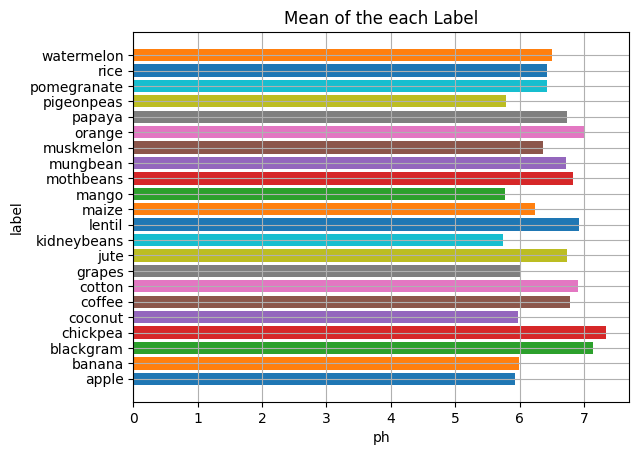

In [ ]:
import seaborn as sns
for feature in unique_features:
    data_subset = dataset[dataset['label'] == feature]
    mean_of_temps = np.mean(data_subset['ph'])
    plt.barh(feature , mean_of_temps)
    plt.grid(True)
    plt.xlabel('ph')
    plt.ylabel('label')
    plt.title('Mean of the each Label')


plt.show()

In [ ]:
X_train = pd.DataFrame(X_train)
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)


VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True])

In [ ]:
X_train.columns[var_thres.get_support()]

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph'], dtype='object')

In [ ]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]
print(constant_columns)
X_train.drop(constant_columns,axis=1)

[]


,N,P,K,temperature,humidity,ph
1863,1,12,30,27.754298,95.946438,5.562224
987,11,10,45,22.630452,88.455772,6.397996
375,5,74,21,16.244692,21.357939,5.591704
1071,105,88,54,25.787498,84.511942,6.020445
37,95,39,36,23.863305,83.152508,5.561399
...,...,...,...,...,...,...
960,1,27,36,23.985988,93.342366,5.684995
905,31,25,38,24.962732,92.405014,6.497367
1096,92,81,52,28.010680,76.528081,5.891414
235,28,58,81,17.475010,16.543148,6.180427


                    N         P         K  temperature  humidity        ph
N            1.000000 -0.218255 -0.123510     0.031661  0.191702  0.081523
P           -0.218255  1.000000  0.728185    -0.139788 -0.128617 -0.133510
K           -0.123510  0.728185  1.000000    -0.170403  0.178952 -0.166429
temperature  0.031661 -0.139788 -0.170403     1.000000  0.221012 -0.015523
humidity     0.191702 -0.128617  0.178952     0.221012  1.000000 -0.015720
ph           0.081523 -0.133510 -0.166429    -0.015523 -0.015720  1.000000


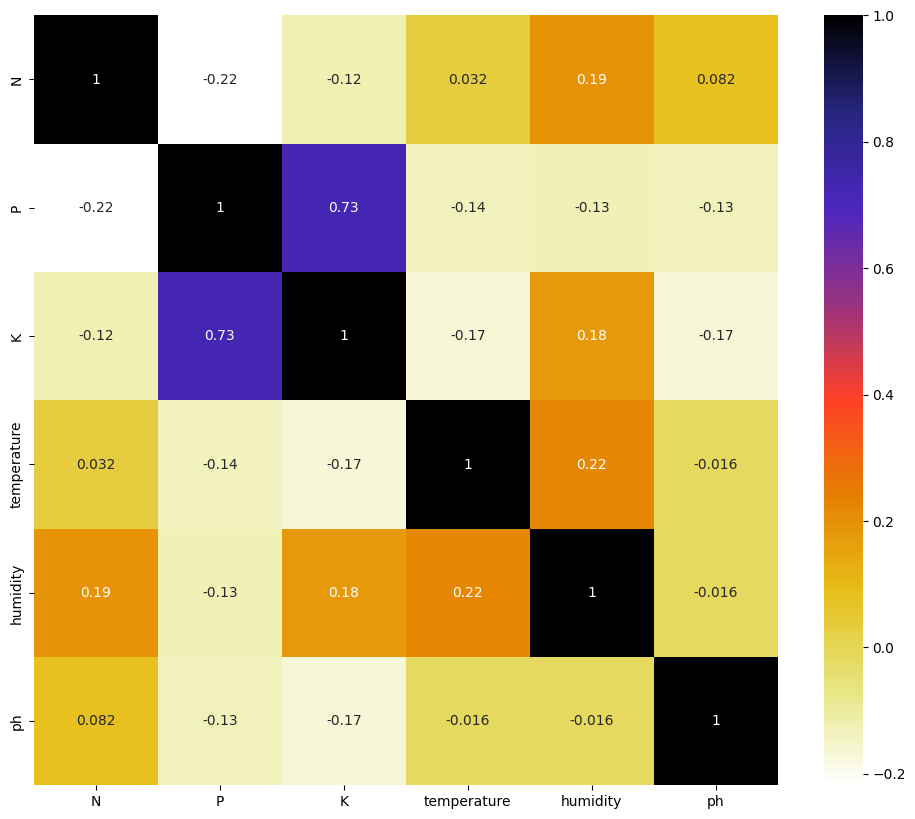

In [ ]:
cor = X_train.corr()
print(cor)
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

#Define Model Building Function:
def create_model():
  # Your ANN model definition here (same as the provided code)
  ann = tf.keras.models.Sequential()
  # ... (rest of your model definition)
  ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return ann


#KFold & Model Wrapper:
# Define the number of folds for cross-validation (e.g., 10)
kfold = KFold(n_splits=10, shuffle=True)

# Wrap your model building function with KerasClassifier
model_wrapper = KerasClassifier(build_fn=create_model, epochs=200, verbose=0)


#Perform KFold Cross-Validation:

# Perform KFold cross-validation with the wrapped model
from sklearn.model_selection import cross_val_score

# Use accuracy metric (you can change this to another metric)
accuracies = cross_val_score(estimator=model_wrapper, X=X_train, y=y_train, cv=kfold)

# Print the average accuracy across all folds
print("KFold Cross-Validation Accuracy:", accuracies.mean())


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

In [ ]:
corr_features

{'K'}

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,N,P,temperature,humidity,ph
1276,25,129,17.986678,81.177121,5.777271
1446,106,20,29.730197,90.970157,6.342573
335,33,59,22.642369,21.593961,5.947000
1458,89,9,29.471563,90.770696,6.668383
2038,62,49,24.217446,82.852840,7.479248
...,...,...,...,...,...
1508,22,144,21.911913,91.687481,6.499227
1595,40,120,23.805938,92.488795,5.889481
1032,105,74,25.145176,81.382041,6.098369
1330,118,15,24.214957,84.205770,6.538006


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

[0.14204983 0.16286997 0.23409191 0.12294133 0.25536526 0.08268169]


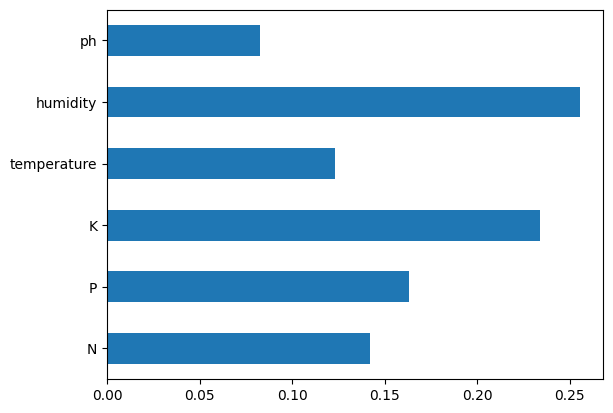

In [ ]:
print(model.feature_importances_)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.plot(kind='barh')
plt.show()

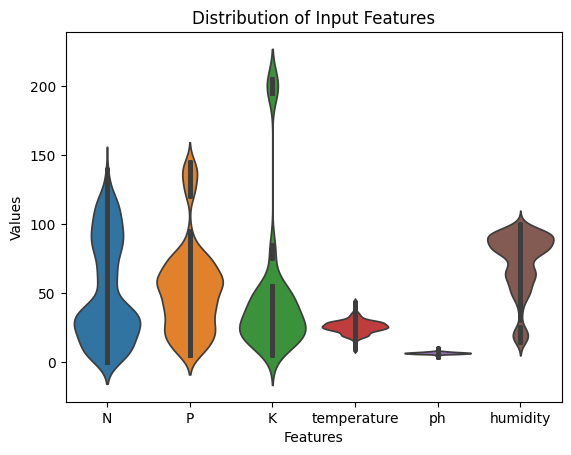

In [ ]:

df_X = pd.DataFrame(X, columns=['N', 'P', 'K', 'temperature','ph','humidity'])  # Replace 'Feature_1', 'Feature_2', ... with actual feature names

# Create violin plots using Seaborn
sns.violinplot(data=df_X, inner="points")

# Add title and labels
plt.title('Distribution of Input Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()

In [ ]:
training_set = np.column_stack((X_train, y_train))
print(training_set)
training_set_labeled = pd.DataFrame(training_set, columns=dataset.columns)

[[1.0 12.0 30.0 ... 95.94643831 5.56222383 'coconut']
 [11.0 10.0 45.0 ... 88.45577158 6.397995609 'pomegranate']
 [5.0 74.0 21.0 ... 21.35793891 5.591704014 'kidneybeans']
 ...
 [92.0 81.0 52.0 ... 76.52808057 5.891413895 'banana']
 [28.0 58.0 81.0 ... 16.54314829 6.18042747 'chickpea']
 [95.0 74.0 50.0 ... 80.47152737 6.002481605 'banana']]


In [ ]:
def detect_outliers(data):
    outliers = []
    threshold=3.5
    mean = np.mean(data)
    std =np.std(data)


    for i in data:
        z_score= (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [ ]:
outlier_ph=detect_outliers(X_train.ph)
outlier_ph

[9.45949344,
 9.679240873,
 3.558822825,
 3.510404312,
 3.532008668,
 3.71105919,
 9.93509073,
 9.406887533,
 9.254089438,
 3.692863601,
 9.926212291,
 9.392694614]

In [ ]:
training_set_labeled = training_set_labeled[~training_set_labeled['ph'].isin(outlier_ph)]
training_set_labeled.shape

(1748, 7)

In [ ]:
outlier_temp=detect_outliers(X_train.temperature)
outlier_temp

[43.67549305]

In [ ]:
training_set_labeled = training_set_labeled[~training_set_labeled['temperature'].isin(outlier_temp)]
training_set_labeled.shape

(1747, 7)

In [ ]:
def detect_outliers_quantile(data):
    outliers = []
    threshold=3
    quantile1, quantile3= np.percentile(data,[25,75])
    iqr=quantile3-quantile1

    upper_bridge=quantile3 +(threshold * iqr)
    lower_bridge=quantile1 -(threshold * iqr)


    for i in data:
        if i > upper_bridge or i < lower_bridge:
            outliers.append(i)
    return outliers

In [ ]:
unique_values = np.unique(training_set_labeled['label'])
print(unique_values.shape )
skewed_features = [X_train.N , X_train.P , X_train.K , X_train.humidity]

for i in skewed_features:
    outlier_skewed = detect_outliers_quantile(i)
    print('Outliers in ' , i.name)
    print(outlier_skewed)
    #training_set_labeled = training_set_labeled[~training_set_labeled[i.name].isin(outlier_skewed)]
    print(training_set_labeled.shape)
    unique_values = np.unique(training_set_labeled['label'])
    print(unique_values.shape )

(22,)
Outliers in  N
[]
(1747, 7)
(22,)
Outliers in  P
[]
(1747, 7)
(22,)
Outliers in  K
[196, 205, 201, 196, 197, 195, 200, 200, 203, 196, 196, 204, 204, 197, 198, 198, 197, 201, 198, 201, 204, 205, 203, 205, 203, 197, 196, 202, 198, 198, 197, 204, 201, 201, 204, 196, 196, 201, 204, 204, 202, 201, 195, 205, 199, 196, 199, 199, 198, 197, 204, 203, 197, 197, 204, 200, 198, 203, 203, 195, 203, 203, 197, 196, 198, 203, 203, 200, 203, 203, 195, 197, 197, 196, 202, 205, 199, 200, 205, 196, 204, 195, 205, 199, 205, 201, 202, 205, 197, 195, 197, 200, 196, 199, 196, 202, 199, 200, 201, 200, 196, 203, 195, 200, 203, 196, 202, 197, 204, 202, 197, 196, 199, 201, 195, 195, 197, 200, 195, 204, 197, 198, 204, 204, 204, 205, 202, 204, 201, 197, 195, 201, 198, 200, 201, 195, 201, 196, 195, 198, 203, 204, 202, 201, 204, 197, 198, 203, 205]
(1747, 7)
(22,)
Outliers in  humidity
[]
(1747, 7)
(22,)


In [ ]:
training_set_labeled.shape
X_train = training_set_labeled.iloc[ : , :-1].values
y_train = training_set_labeled.iloc[ : , 6:7].values #to get a 2-D array
print(X_train.shape)
print(y_train.shape)

(1747, 6)
(1747, 1)


In [ ]:
y_test = y_test.reshape(-1, 1)
print(y_test.shape)
y_new = np.row_stack((y_train, y_test))
print(y_new.shape)

(440, 1)
(2187, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 5)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Replace 'sparse' with 'sparse_output' in OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [0])], remainder='passthrough')
y_train= np.array(ct.fit_transform(y_train))
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dense(units=22, activation='softmax'))
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = ann.fit(X_train, y_train, batch_size = 128, epochs = 200, validation_split=0.2)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.0636 - loss: 3.7813 - val_accuracy: 0.1171 - val_loss: 3.3527
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1039 - loss: 3.3209 - val_accuracy: 0.1314 - val_loss: 3.0097
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1583 - loss: 2.9867 - val_accuracy: 0.2257 - val_loss: 2.7571
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2597 - loss: 2.6912 - val_accuracy: 0.2514 - val_loss: 2.5608
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2690 - loss: 2.5242 - val_accuracy: 0.2971 - val_loss: 2.3856
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3538 - loss: 2.3217 - val_accuracy: 0.3371 - val_loss: 2.2238
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3825 - loss: 2.1420 - val_accuracy: 0.3600 - val_loss: 2.0755
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4204 - loss: 1.9882 - val_accuracy: 0.471

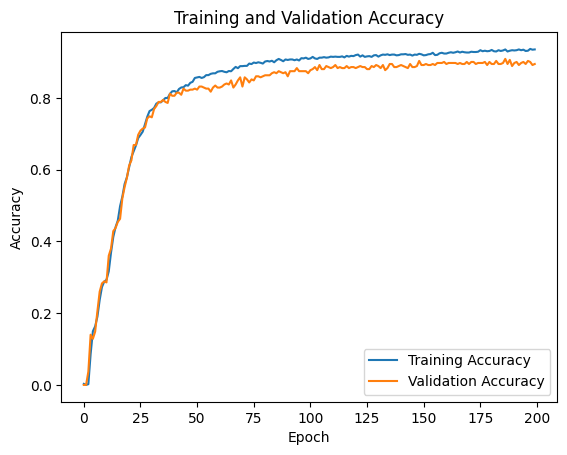

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

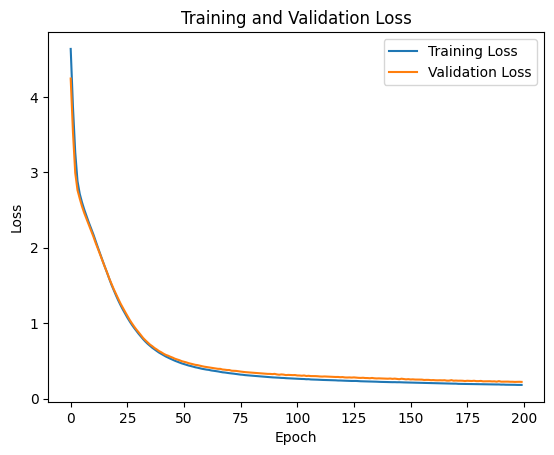

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

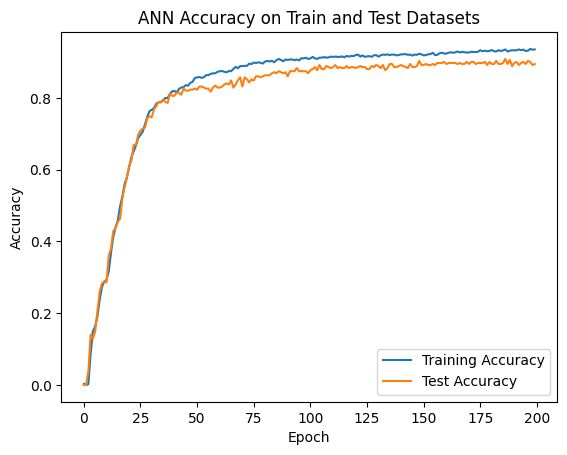

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ANN Accuracy on Train and Test Datasets')
plt.show()

In [ ]:
pred = ann.predict(lda.transform(sc.transform([[20,19,35,34.17719782,50.62161586,6.113935087]])))
pred = ct.named_transformers_['encoder'].inverse_transform(pred)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[['mango']]
